In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from mpl_toolkits.mplot3d import Axes3D
from heuristi_plot_1 import plot as hplot

path = '../output_data/'

In [2]:
# carbon budgets from 2011 onwards
b15p66 = 400 # Giga tones of co2 https://www.carbontracker.org/carbon-budgets-explained/ and IPCC2013
b15p50 = 550
b15p33 = 850
b20p66 = 1000

def Gtco2_to_Mtoe(budget_Gtco2):
    c1 = 0.43 # tons of co2 per barrel oil https://www.epa.gov/energy/greenhouse-gases-equivalencies-calculator-calculations-and-references
    c2 = 7.33 # barrels per toe https://en.wikipedia.org/wiki/Tonne_of_oil_equivalent
    c3 = 10e6 # tons per megaton

    x1 = budget_Gtco2/c1 # budged in giga tones CO2/CO2 emissions per barrel -> budget in billion barrels oil
    x2 = x1/c2 # budget in billion barrels / barrels per toe -> budget in Gtoe
    budget_mtoe = x2*10e2 # budget in Gtoe * 10^3 -> budget in Mtoe
    
    return budget_mtoe
print(Gtco2_to_Mtoe(b15p33))

269678.6065547765


phi = 0.5
1018113.3394430811


/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/home/jakob/Project_Divestment/evaluation_notebooks/heuristi_plot_1.py:220: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


phi = 0.7
1018113.0413418452


/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/home/jakob/Project_Divestment/evaluation_notebooks/heuristi_plot_1.py:220: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


phi = 0.9
1018110.0107252502
no data
no data


/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/home/jakob/Project_Divestment/evaluation_notebooks/heuristi_plot_1.py:220: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


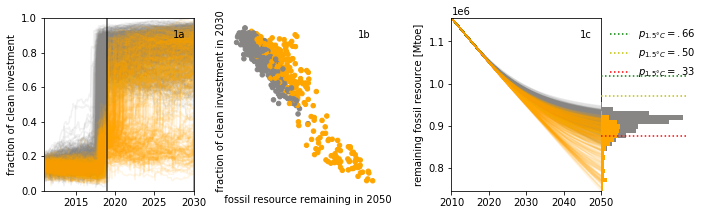

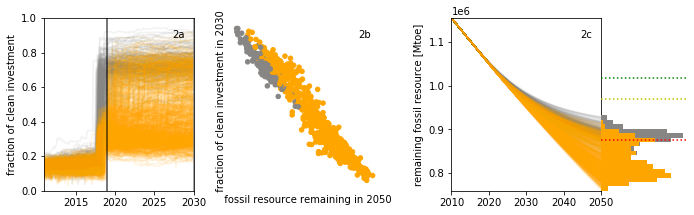

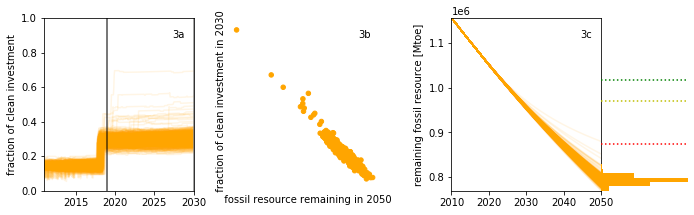

In [3]:
for n_plot, i in enumerate([5, 7, 9]):
#for i in [5, 8, 9]:
    print(f'phi = 0.{i}')
    with pd.HDFStore(path + 'X0c.h5') as store:
        trj = store.select('dat_0', where=f'phi=.{i}')
    with pd.HDFStore(path + 'X0c.h5') as store:
        trj2 = store.select('dat_2', where=f'phi=.{i}')
        
    G_start = trj['G'].xs(level='tstep', key=1).max()

    trj2.index.names = trj.index.names

    for trj_i in [trj, trj2]:
        trj_i.index = trj_i.index.droplevel(['eps', 'phi', 'test'])
        trj_i = trj_i.reset_index().drop_duplicates(['sample', 'tstep']).set_index(['sample', 'tstep'])
    trj = trj.reset_index().drop_duplicates(['sample', 'tstep']).set_index(['sample', 'tstep'])
    trj2 = trj2.reset_index().drop_duplicates(['sample', 'tstep']).set_index(['sample', 'tstep'])

    dfN = pd.DataFrame(index=trj.index.levels[0])
    
    print(G_start-Gtco2_to_Mtoe(b15p66))
    
    budgets = [{'value': G_start-Gtco2_to_Mtoe(b15p66),
                'color': 'g',
                'label': '$p_{1.5°C}=.66$'},
              {'value':  G_start-Gtco2_to_Mtoe(b15p50),
                'color': 'y',
                'label': '$p_{1.5°C}=.50$'},
              {'value':  G_start-Gtco2_to_Mtoe(b15p33),
                'color': 'r',
                'label': '$p_{1.5°C}=.33$'}]

    fig = plt.figure(figsize=(10, 3))
    hplot(fig, trj, trj2, thresh_time=9., plot_no=str(n_plot+1), hlines=budgets)

    fig.savefig(f'fitted_initials_evaluation0{i}.pdf')